# sklearn.dataset import load_boston
- .DESCR : dataset에 대한 설명
- .data : 모든 data
- .feature_names : Columns
- .target : 종속변수 Y
-
# Data Frame / Numpy
- .shape / info() / describe() : row x col / column, data type 및 count / 통계적 정보(min/max/mean/std/...)
- np.sqrt() 
- np.round(x,n) : x를 n의자리 수만큼 반올림
- .columns 
- .sort_values() : 정렬 (ascending=False : 내림차순)
- 
# sklearn.
- LinearRegression
 - .fit(X_train,Y_train) : 훈련 데이터를 넣어서 회귀함수모델을 만들어냄
 - .predict(X_test) : 만들어진 함수모델에 X_test 값을 넣었을 때 예측값 
 - .intercept_ : Y 절편
 - .coef_ : 각 변수들의 상관계수
- train_test_split(X,Y, test_size = 0~1(1:100%), random_state=) 
- mean_squared_error(MSE) : 합계(실제값-예측값)^2/n
- r2_score(Variance Score,결정계수) : 예측값의 분산 / 실제값의 분산
-
# pyplot
- .subplots
- 
# seaborn
- .regplot() : 산점도 그래프와 선형 회귀 그래프를 함께 그려줌

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
boston = load_boston()
# print(boston.DESCR) # dataset에 대한 설명
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
boston_df.shape
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [35]:
# X/Y data 추출
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=156)

In [36]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [37]:
Y_predict = lr.predict(X_test)

In [38]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE:{0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test,Y_predict)))

MSE:17.297, RMSE: 4.159
R^2(Variance score) : 0.757


In [39]:
print('회귀계수: ',np.round(lr.coef_, 1))
print('Y절편: ',lr.intercept_)

회귀계수:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
Y절편:  40.995595172164336


In [40]:
coef = pd.Series(data=np.round(lr.coef_,2),index=X.columns)
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

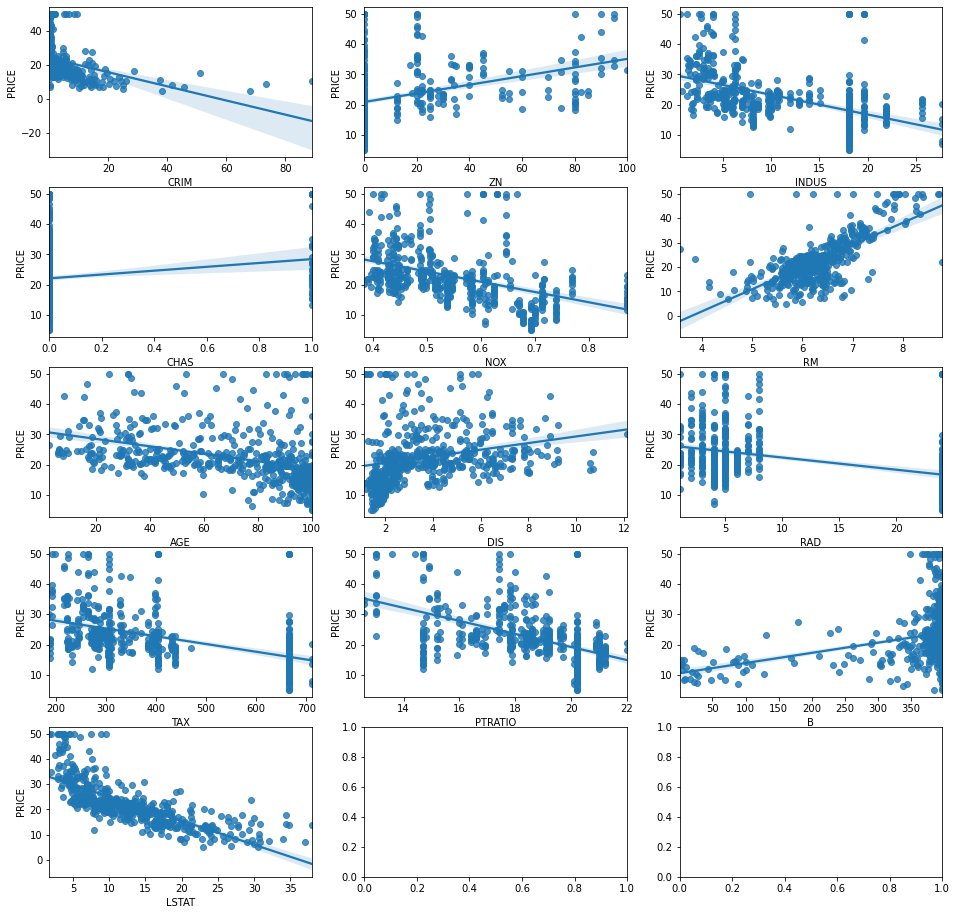

In [41]:
fig,axs = plt.subplots(figsize=(16,16), ncols=3, nrows=5)
x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i,feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])